### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist

### Problems

Use the prompts below to get started with your data analysis.  

<h4>1. Read in the `coupons.csv` file.</h4>




In [108]:
data = pd.read_csv('data/coupons.csv')

In [109]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,12674,12675,12676,12677,12678,12679,12680,12681,12682,12683
destination,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,...,Home,Home,Home,Home,Home,Home,Work,Work,Work,Work
passanger,Alone,Friend(s),Friend(s),Friend(s),Friend(s),Friend(s),Friend(s),Kid(s),Kid(s),Kid(s),...,Alone,Alone,Alone,Partner,Partner,Partner,Alone,Alone,Alone,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Rainy,Snowy,Sunny,Sunny,Sunny,Rainy,Rainy,Snowy,Snowy,Sunny
temperature,55,80,80,80,80,80,55,80,80,80,...,55,30,80,30,30,55,55,30,30,80
time,2PM,10AM,10AM,2PM,2PM,6PM,2PM,10AM,10AM,10AM,...,10PM,10PM,6PM,6PM,10PM,6PM,7AM,7AM,7AM,7AM
coupon,Restaurant(<20),Coffee House,Carry out & Take away,Coffee House,Coffee House,Restaurant(<20),Carry out & Take away,Restaurant(<20),Carry out & Take away,Bar,...,Coffee House,Coffee House,Restaurant(20-50),Restaurant(<20),Restaurant(<20),Carry out & Take away,Carry out & Take away,Coffee House,Bar,Restaurant(20-50)
expiration,1d,2h,2h,2h,1d,2h,1d,2h,2h,1d,...,2h,2h,1d,1d,2h,1d,1d,1d,1d,2h
gender,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
age,21,21,21,21,21,21,21,21,21,21,...,26,26,26,26,26,26,26,26,26,26
maritalStatus,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,...,Single,Single,Single,Single,Single,Single,Single,Single,Single,Single


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<h4>Dimensions of Dataset (number of rows and columns)</h4>

In [111]:
data.shape

(12684, 26)

<h4>Quick assessment of missing values</h4>

In [112]:
print(data.car.unique())
(100.00 * data.isnull().sum()) / data.shape[0]

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

Percentage > 50% indicates that the particular column is not useful in terms of predictions. I just happen to use one more method below to dtermine the same. Use either method.

<h4>2. Investigate the dataset for missing or problematic data.</h4>

Same result as above ... just different method.

In [113]:
null = data.isnull().sum()/len(data)
null_values = null[null>0].sort_values(ascending=False)
null_values

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
dtype: float64

It is recommended to remove feature whose missing value number is > 50% in this case the column "car" qualifies for removal.

In [114]:
data.drop('car', inplace=True, axis=1)

<h4>Find out more missing data</h4>

<h4>These columns describes how many times per month the individual being offered the coupon:</h4>

 - CoffeeHouse: Goes to a Coffee House
 - CarryAway: Gets Carry-Out food
 - Bar: Goes to a Bar
 - Restaurant20To50: Goes to a restaurant where the price per person is $20 to $50
 - RestaurantLessThan20: Goes to a restaurant where the price per person is less than $20
 

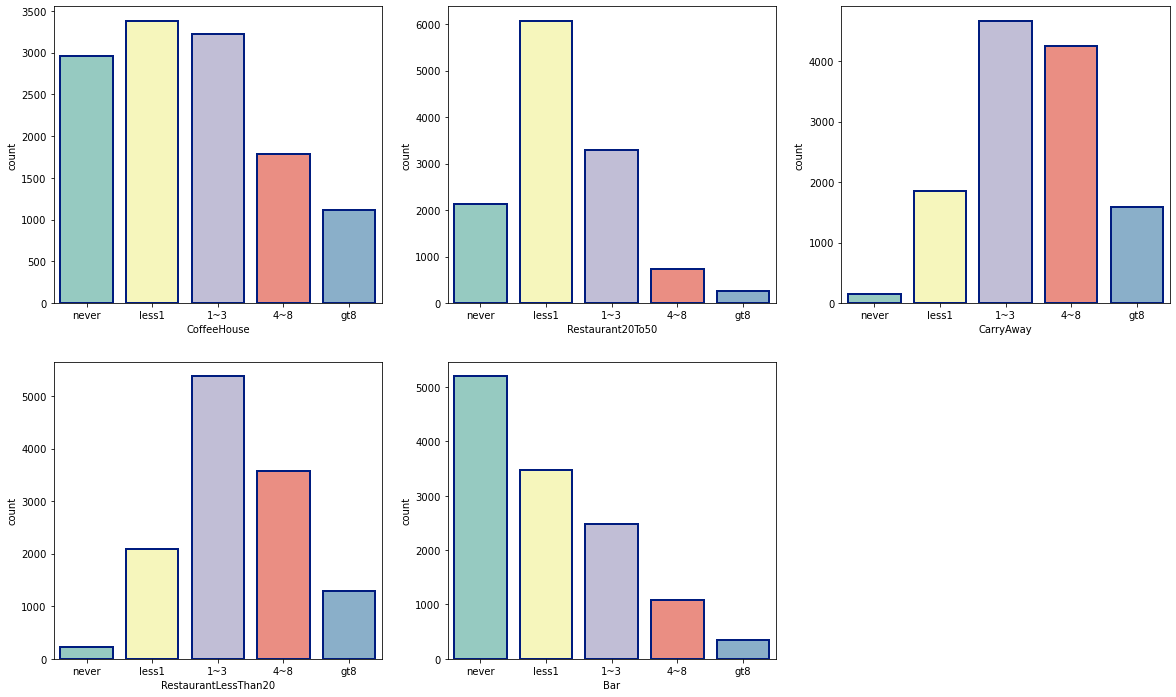

In [115]:
null = data.isnull().sum()/len(data)
null_values = null[null>0].sort_values(ascending=False)

i, j = 0, 0
plots_per_row = 3
fig, axs = plt.subplots(2,3, figsize=(20, 12))
order = ['never', 'less1', '1~3', '4~8', 'gt8']

for item in list(null_values.index):
    sns.countplot(x=item, data=data, ax=axs[i][j], order=order, palette = 'Set3', linewidth=2,
                   edgecolor=sns.color_palette("dark", 1))
    axs[i][j].set_xlabel(item)
    j += 1
    if j % plots_per_row == 0:
        i += 1
        j = 0
axs[1][2].set_axis_off()
plt.show()

Since the coupons we are giving away are for Coffee Shops, Restaurants, and Bars; the amount of times per months people go to these places probably has a very high predictive value on whether or not they will accept the coupon. In order not to taint our data at all, it doesn't make a lot of sense to just try to impute or assign values.

Let's see how many rows total we would have to drop in order to just get rid of all missing values.

In [116]:
print('Number of rows to drop: {}'.format(len(data)- len(data.dropna())))
print('Percent of rows to drop: {}'.format(round((len(data)- len(data.dropna()))/len(data),2)))
data = data.dropna()

Number of rows to drop: 605
Percent of rows to drop: 0.05


Dropping 5% of our dataset. This will not terribly affect out predictions.

<h4>3. Decide what to do about your missing data -- drop, replace, other...</h4>

Imputing the missing values is also a valid method in this case by using Most Frequent values

Other missing values in
   - 'Bar'
   - 'CoffeeHouse'
   - 'CarryAway' 
   - 'RestaurantLessThan20'
   - 'Restaurant20To50' 
      are not significant numbers. 
      
Thus they can be replaced by the attribute with the largest count

In [117]:
for col in data.columns[data.isna().any()]:
    largest_count = data[col].value_counts().idxmax()
    data = data.fillna({col: largest_count})
    
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


<h3>Let's review the data now</h3>

This is demonstrate the distribution of the target variable "Y" 
which will tell us the acceptace vs rejection rate of the coupon by all the drivers

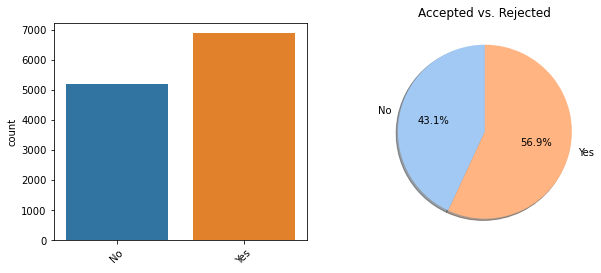

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='Y', data=data, ax=axs[0])
axs[0].set_xticklabels(['No', 'Yes'], rotation = 45)
axs[0].set_xlabel('')
axs[1].pie(data.groupby('Y').size(), labels=['No', 'Yes'], colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set_title('Accepted vs. Rejected')
plt.show()

We'll have the confirmations of these findings in our subsequent data exploration

In [119]:
for col in data.select_dtypes('object').columns:
    print(col, data[col].unique())
    

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Male' 'Female']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
education ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'R

It is always good to get the possible column values to explore the data further

<h4>4. What proportion of the total observations chose to accept the coupon?</h4> 



In [120]:
total_affirmative = data.loc[data['Y'] == 1].count()
total_negative = data.loc[data['Y'] == 0].count()
overall_total = total_affirmative + total_negative
overall_total = data.shape[0]
proportion_affirmative = (total_affirmative *100) / overall_total
proportion_negative = (total_negative *100) / overall_total
print("Total Observations ==> ", overall_total, 
      "\nTotal Affirmative ==> " ,total_affirmative[0], 
      "\nTotal Negative ==> " , total_negative[0],
      "\nPropotion Affirmative ==> "  , proportion_affirmative[0],
      "\nPropotion Negative ==> "  , proportion_negative[0])

#proportion_affirmative = (100.00 * data.loc[data['Y'] == 1].count() / data.shape[0])
#proportion_negative = (100.00 * data.loc[data['Y'] == 0].count() / data.shape[0])
#print(proportion_affirmative)
#print(proportion_negative)


Total Observations ==>  12079 
Total Affirmative ==>  6877 
Total Negative ==>  5202 
Propotion Affirmative ==>  56.93352098683666 
Propotion Negative ==>  43.06647901316334


As you can see, the pie chart and the above assessment is very much in line with eather other

<h4>5. Use a bar plot to visualize the `coupon` column.</h4>

 - Just introduced expiration as hue to see the coupon expiration pattern

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

<Figure size 1152x648 with 0 Axes>

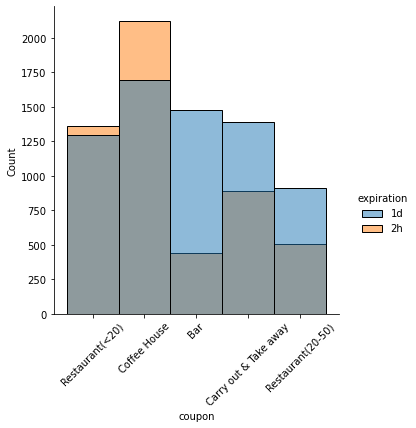

In [121]:
plt.figure(figsize=(16,9))
sns.displot(data, x='coupon', hue = 'expiration', kind = "hist", color = '#DC143C')
plt.xticks(rotation=45)

<h4>6. Use a histogram to visualize the temperature column.</h4>

<AxesSubplot:xlabel='temperature', ylabel='Count'>

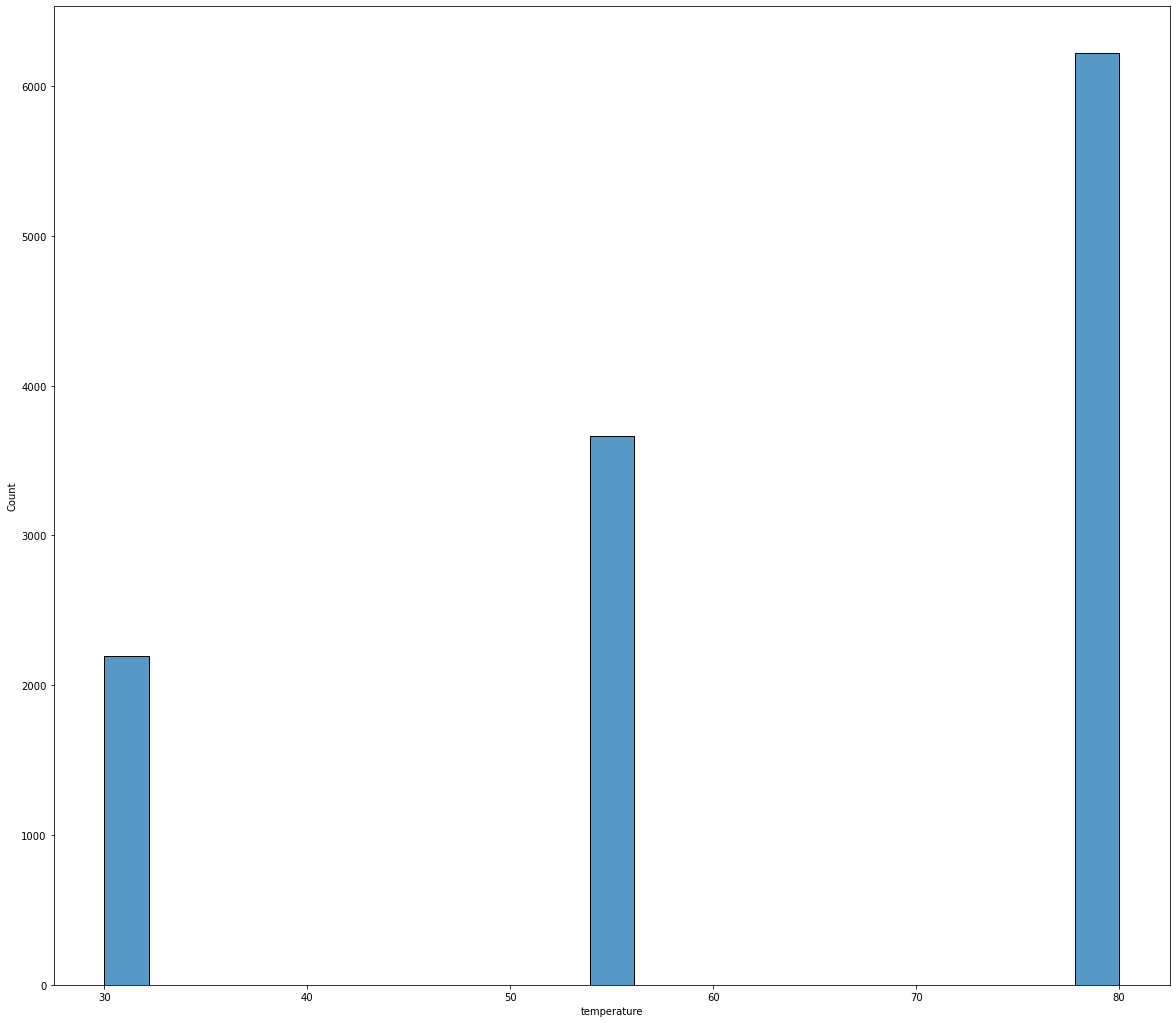

In [122]:
sns.histplot(data, x= "temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [123]:
data_bar = data.query('coupon == "Bar"')
data_bar_count = data.query('coupon == "Bar"').count()
data_bar_count[0]

1913

2. What proportion of bar coupons were accepted?


In [124]:
bar_proportion = (100.00 * data_bar[data_bar['Y'] == 1].count() / data_bar.shape[0])
print(bar_proportion[0])

41.19184526921067


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [125]:
bar_affirmative =  data_bar[data_bar['Y'] == 1]
list_of_less_than_fewer = ['never','less1', '1~3']
total_list = ['never','less1', '1~3', 'gt8','4~8']
three_or_fewer_bar = bar_affirmative.loc[bar_affirmative['Bar'].isin(list_of_less_than_fewer)].count()
total_bar = data_bar.loc[data_bar['Bar'].isin(total_list)].count()
acceptance_rate = (100.00 * three_or_fewer_bar) / total_bar

print("\nThree or fewer acceptance count ==> ", three_or_fewer_bar[0],
      "\nTotal bar acceptance ==>", total_bar[0],
      "\nAcceptance Rate ==>", acceptance_rate[0])



Three or fewer acceptance count ==>  641 
Total bar acceptance ==> 1913 
Acceptance Rate ==> 33.50757971772086


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [126]:
# More than once a month
driver_frequency = ['1~3', 'gt8','4~8']
list_above_25 = ['46','26','31','41','50plus','36']
bar_more_than_once_a_month = bar_affirmative.loc[bar_affirmative['Bar'].isin(driver_frequency)]
total_driver_above_25 = bar_more_than_once_a_month.loc[bar_more_than_once_a_month['age'].isin(list_above_25)].count()
total_bar_drivers = data_bar.count()
acceptance_rate_above_25 = (100.00 * total_driver_above_25[0]) / total_bar_drivers[0]

print("\nTotal driver above the age of 25 who go to the bar more than once a month ==> ", total_driver_above_25[0],
      "\nTotal drivers who go to the bar ==>", total_bar_drivers[0],
      "\nAcceptance Rate of drivers > 25 ==>", acceptance_rate_above_25)


Total driver above the age of 25 who go to the bar more than once a month ==>  278 
Total drivers who go to the bar ==> 1913 
Acceptance Rate of drivers > 25 ==> 14.532148457919499


In [127]:
list_below_25 = ['21','below21']
total_driver_below_25 = bar_more_than_once_a_month.loc[bar_more_than_once_a_month['age'].isin(list_below_25)].count()
total_bar_drivers = data_bar.count()
acceptance_rate_below_25 = (100.00 * total_driver_below_25[0]) / total_bar_drivers[0]

print("\nTotal driver above the age of 25 who go to the bar more than once a month ==> ", total_driver_below_25[0],
      "\nTotal drivers who go to the bar ==>", total_bar_drivers[0],
      "\nAcceptance Rate of drivers < 25 ==>", acceptance_rate_below_25)


Total driver above the age of 25 who go to the bar more than once a month ==>  114 
Total drivers who go to the bar ==> 1913 
Acceptance Rate of drivers < 25 ==> 5.9592263460533195


<h3>5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers.</h3>

<h3>Hypothesis</h3>

<h4>The hypothesis we test is if the above difference of proportions will be zero or not equal to zero(a two tailed test will be required).</h4>
    
<h4>Mathematically, we represent it as:</h4>

 - H0 = pm - pf (=0 Null Hypothesis)
 - Ha = pm - pf (!=0 Alternate Hypothesis)

<h3>Hypothesis(Null Vs Alternative)</h3>

</h3>Parameter of Interest</h3>

 - We read the data and select only two of the relevant columns from the data set. 
 - The column ‘Y’(1 if the individual "accepted" the coupon, else 0 if they "Rejected" it) 
 - The variable ‘age’(Driver above the age of 25). 
 - We set the parameter of interest as the difference in proportions of the individuals who Accepted the coupon
 - based on their "age". 
 
 Formulation of the parameter of interest is :

In [128]:
new_data = bar_more_than_once_a_month
new_data = data.dropna() #Drop the nan values

contingency_table = pd.crosstab(new_data.Y,new_data.age.isin(list_above_25), margins = False) #Contingency Table
contingency_table

age,False,True
Y,,
0,1215,3987
1,1826,5051


The above table is called as a contingency table and gives us a cross-tab view of the counts pertaining to each category. Let us convert the above numbers into proportions, to get an idea.

In [129]:
contingency_table = (round(pd.crosstab(new_data.Y,new_data.age).apply(lambda r:r/r.sum(),axis=0)*100,2))
contingency_table


age,21,26,31,36,41,46,50plus,below21
Y,,,,,,,,
0,40.6,40.02,44.78,46.13,42.54,42.32,49.25,36.71
1,59.4,59.98,55.22,53.87,57.46,57.68,50.75,63.29


Text(0.5, 0, 'Accepted/Rejected')

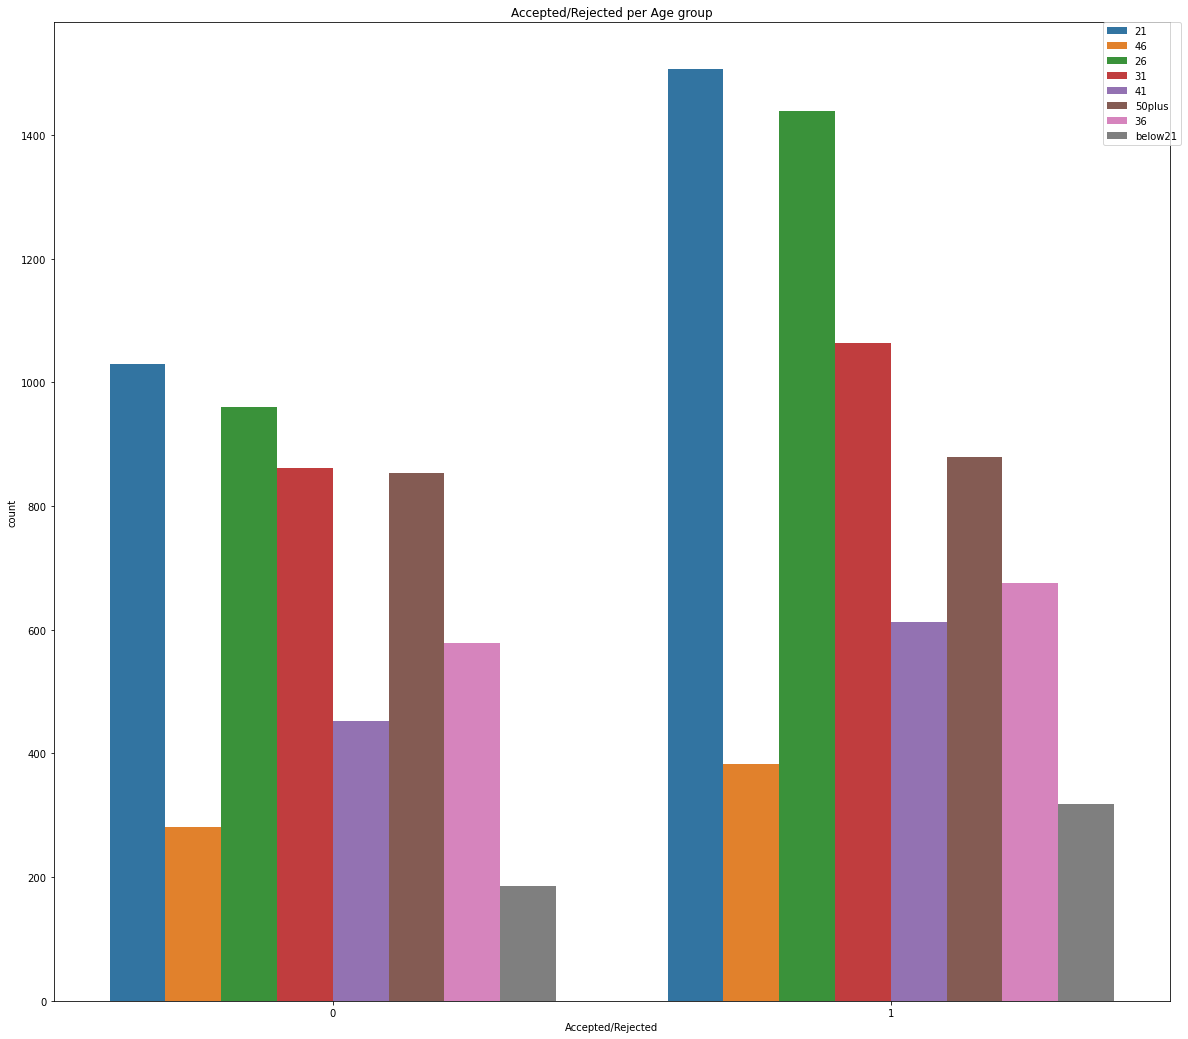

In [130]:
sns.countplot( x="Y",data = new_data, hue='age')
plt.title("Accepted/Rejected per Age group")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.xlabel("Accepted/Rejected")

In [131]:
from scipy import stats
from statsmodels.stats import weightstats as stests

data1 = contingency_table.iloc[0]
data2 = contingency_table.iloc[1]

ztest ,pval = stests.ztest(data1, x2=data2, value=0.695)
print('\nstat=%.3f, pval=%.3f' % (ztest, pval))
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



stat=-7.744, pval=0.000
9.63780102476454e-15
reject null hypothesis


6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [132]:
if p < 0.005:
    print('Probably independent')
else:
    print('Probably dependent')
    

Probably independent


7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [133]:

from scipy import stats
from statsmodels.stats import weightstats as stests

list_passangers = ['Kid(s)']          
list_occupation = ['Farming Fishing & Forestry']
new_data = new_data[~new_data.passanger.isin(list_passangers)]
new_data = new_data[~new_data.occupation.isin(list_occupation)]

contingency_table2 = (round(pd.crosstab(new_data.Y,new_data.age).apply(lambda r:r/r.sum(),axis=0)*100,2))

data3 = contingency_table2.iloc[0]
data4 = contingency_table2.iloc[1]

ztest,pval = stests.ztest(data1, x2=data2, value=0.695)
print('\nstat=%.3f, pval=%.3f' % (ztest, pval))
print(float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



stat=-7.744, pval=0.000
9.63780102476454e-15
reject null hypothesis


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [134]:
from scipy import stats
from statsmodels.stats import weightstats as stests

list_passangers = ['Kid(s)'] 
list_maritalstatus = ['Widowed']
list_age = ['46', '31', '41', '50plus', '36']
list_income =['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More', '$87500 - $99999']
list_bar_gr8_4time = ['never','less1','1~3']

new_data = new_data[~new_data.passanger.isin(list_passangers)]
new_data = new_data[~new_data.maritalStatus.isin(list_maritalstatus)]
new_data = new_data[~new_data.income.isin(list_income)]
new_data = new_data[~new_data.Bar.isin(list_bar_gr8_4time)]

contingency_table3 = (round(pd.crosstab(new_data.Y,new_data.age).apply(lambda r:r/r.sum(),axis=0)*100,2))

data5 = contingency_table3.iloc[0]
data6 = contingency_table3.iloc[1]

ztest ,pval = stests.ztest(data1, x2=data2, value=0.695)
print('\nstat=%.3f, pval=%.3f' % (ztest, pval))
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


stat=-7.744, pval=0.000
9.63780102476454e-15
reject null hypothesis


9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [135]:
# Please see the end of independent analysis

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [136]:
list_of_coupons = data['coupon'].unique().tolist()
list_of_coupons
data.duplicated().sum()
print(f"Data Frame Dimension Before Duplicate Removal: {data.shape}")
data = data.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {data.shape}")
data_numerical = data.select_dtypes(include=["int","float"])
print(f"Data Frame Numerical: {data_numerical.shape}")
data_numerical.isnull().sum()
data_numerical.head()

Data Frame Dimension Before Duplicate Removal: (12079, 25)
Data Frame Dimension After Duplicate Removal: (12007, 25)
Data Frame Numerical: (12007, 8)


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,55,0,1,0,0,0,1,1
23,80,0,1,0,0,0,1,0
24,80,0,1,0,0,0,1,1
25,80,0,1,1,0,0,1,0
26,80,0,1,0,0,0,1,0


In [137]:
print(f"Data Frame Dimension Before Duplicate Removal: {data.shape}")
data = data.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {data.shape}")
data_numerical = data.select_dtypes(include=["int","float"])
print(f"Data Frame Numerical: {data_numerical.shape}")
data_numerical.isnull().sum()
data_numerical.head()

Data Frame Dimension Before Duplicate Removal: (12007, 25)
Data Frame Dimension After Duplicate Removal: (12007, 25)
Data Frame Numerical: (12007, 8)


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,55,0,1,0,0,0,1,1
23,80,0,1,0,0,0,1,0
24,80,0,1,0,0,0,1,1
25,80,0,1,1,0,0,1,0
26,80,0,1,0,0,0,1,0


In [138]:
data_categorical = data.select_dtypes(exclude=["int","float"])
data_categorical.isnull().sum()

destination             0
passanger               0
weather                 0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'temperature'),
  Text(1.5, 0, 'has_children'),
  Text(2.5, 0, 'toCoupon_GEQ5min'),
  Text(3.5, 0, 'toCoupon_GEQ15min'),
  Text(4.5, 0, 'toCoupon_GEQ25min'),
  Text(5.5, 0, 'direction_same'),
  Text(6.5, 0, 'direction_opp'),
  Text(7.5, 0, 'Y')])

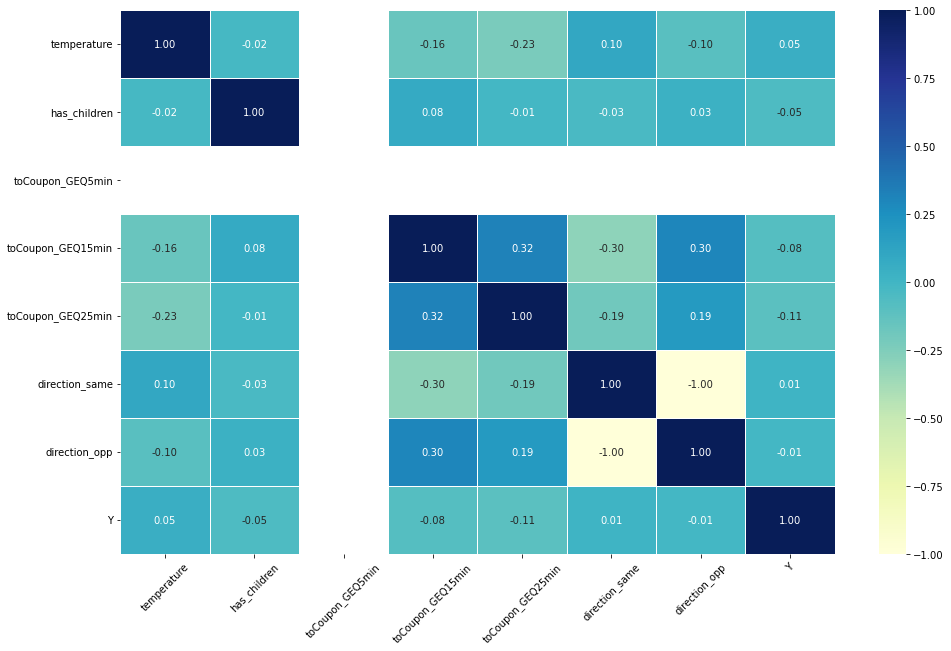

In [139]:
corr_= data_numerical.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "YlGnBu", linewidths=.5)
plt.xticks(rotation=45)

In [140]:
#We want our data to be catogerial in order to be able to convert it to numerical values (encode it)

#making a copy of the DataFrame 
data_to_convert = data.copy()

data_to_convert.dtypes

for col in data_to_convert.columns:
    if data_to_convert[col].dtype == np.object: 
        data_to_convert[col]=data_to_convert[col].astype('category')
    
data_to_convert.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [141]:
#This map is to represent the frequency of visits to restaurants, bars, and coffeehouses.
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

#since some of the cols have the same categories, we can put them in a list
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

#use for loop to match cols with frequency_map
for col in frequency_cols:
    data_to_convert[col] = data_to_convert[col].map(frequency_map)


#This map is to represent the driver's age
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}

#Here we match the age col with age map
data_to_convert['age'] = data_to_convert['age'].map(age_map)

#This map is to represent the driver's income
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

#Here we match the income col with income map
data_to_convert['income'] = data_to_convert['income'].map(income_map)

In [142]:
#To check the categories conversion

for n in data_to_convert.select_dtypes('category').columns:
    print(n, data_to_convert[n].unique())

destination ['No Urgent Place', 'Home', 'Work']
Categories (3, object): ['Home', 'No Urgent Place', 'Work']
passanger ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
Categories (4, object): ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
weather ['Sunny', 'Rainy', 'Snowy']
Categories (3, object): ['Rainy', 'Snowy', 'Sunny']
time ['2PM', '10AM', '6PM', '7AM', '10PM']
Categories (5, object): ['10AM', '10PM', '2PM', '6PM', '7AM']
coupon ['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(20-50)']
Categories (5, object): ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']
expiration ['1d', '2h']
Categories (2, object): ['1d', '2h']
gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
age [1, 6, 2, 3, 5, 7, 4, 0]
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 0]
maritalStatus ['Single', 'Married partner', 'Unmarried partner', 'Divorced', 'Widowed']
Categories (5, object): ['Divorced', 'Married partner', 'Single', 'Unmarr

In [143]:
from sklearn.preprocessing import LabelEncoder
converter = LabelEncoder()
data_to_convert['destination'] = converter.fit_transform(data_to_convert['destination'])
data_to_convert['passanger'] = converter.fit_transform(data_to_convert['passanger'])
data_to_convert['weather'] = converter.fit_transform(data_to_convert['weather'])
data_to_convert['time'] = converter.fit_transform(data_to_convert['time'])
data_to_convert['coupon'] = converter.fit_transform(data_to_convert['coupon'])
data_to_convert['expiration'] = converter.fit_transform(data_to_convert['expiration'])
data_to_convert['gender'] = converter.fit_transform(data_to_convert['gender'])
data_to_convert['maritalStatus'] = converter.fit_transform(data_to_convert['maritalStatus'])
data_to_convert['education'] = converter.fit_transform(data_to_convert['education'])
data_to_convert['occupation'] = converter.fit_transform(data_to_convert['occupation'])

#To check the categories conversion

for n in data_to_convert.select_dtypes('int64').columns:
    print(n, data_to_convert[n].unique())

temperature [55 80 30]
has_children [0 1]
toCoupon_GEQ5min [1]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


In [144]:
#To check the new data types in dataframe
data_to_convert.dtypes

destination                int32
passanger                  int32
weather                    int32
temperature                int64
time                       int32
coupon                     int32
expiration                 int32
gender                     int32
age                     category
maritalStatus              int32
has_children               int64
education                  int32
occupation                 int32
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [145]:
#convert category cols to int

cols = ['age', 'income', 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols:
  data_to_convert[col] = data_to_convert[col].astype('int64')

In [146]:
#To check that datatype converted correctly
data_to_convert.dtypes

destination             int32
passanger               int32
weather                 int32
temperature             int64
time                    int32
coupon                  int32
expiration              int32
gender                  int32
age                     int64
maritalStatus           int32
has_children            int64
education               int32
occupation              int32
income                  int64
Bar                     int64
CoffeeHouse             int64
CarryAway               int64
RestaurantLessThan20    int64
Restaurant20To50        int64
toCoupon_GEQ5min        int64
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Y                       int64
dtype: object

In [147]:
#Now, we check all the features in the dataset
for n in data_to_convert.columns:
    print(n, data_to_convert[n].unique())

destination [1 0 2]
passanger [0 1 2 3]
weather [2 0 1]
temperature [55 80 30]
time [2 0 3 4 1]
coupon [4 2 0 1 3]
expiration [0 1]
gender [1 0]
age [1 6 2 3 5 7 4 0]
maritalStatus [2 1 3 0 4]
has_children [0 1]
education [1 5 0 3 2 4]
occupation [ 0 22  7 24 11 10 21 15  1  5 14 17 16  6 13 20  4 12 23  3 19  9 18  2
  8]
income [5 1 6 4 3 2 8 7 0]
Bar [0 1 2 4 3]
CoffeeHouse [1 3 2 4 0]
CarryAway [3 2 4 1 0]
RestaurantLessThan20 [3 2 1 4 0]
Restaurant20To50 [1 0 2 4 3]
toCoupon_GEQ5min [1]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


array([[<AxesSubplot:title={'center':'destination'}>,
        <AxesSubplot:title={'center':'passanger'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'coupon'}>,
        <AxesSubplot:title={'center':'expiration'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'maritalStatus'}>],
       [<AxesSubplot:title={'center':'has_children'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'Bar'}>],
       [<AxesSubplot:title={'center':'CoffeeHouse'}>,
        <AxesSubplot:title={'center':'CarryAway'}>,
        <AxesSubplot:title={'center':'RestaurantLessThan20'}>,
        <AxesSubplot:title={'center':'Restaurant20To50'}>,
    

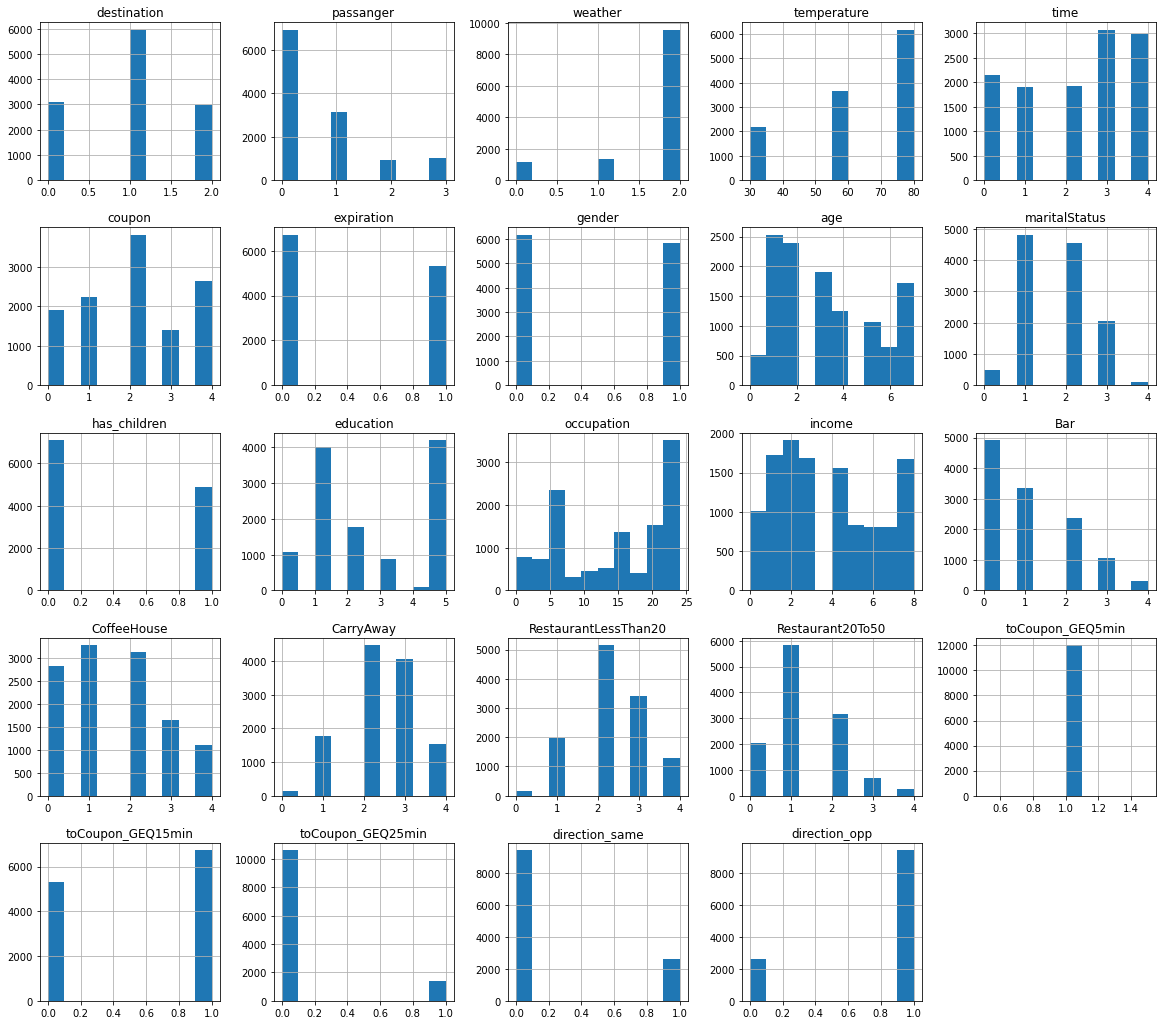

In [148]:
# We start by checking for class imbalance

#Making a copy of df_to_convert
df = data_to_convert.copy()

#to exclude Y col
data_visual = df.loc[:, df.columns!='Y']

#displaying distribution of all feature variables
plt.rcParams["figure.figsize"] = (20, 18)
data_visual.hist()

<h4>Observations:</h4>

<h4>1) The number of the number of observations for each class label is balanced.All features various accross the population.</h4>
    
<h4>2)From the distrabution of the values in direction_same and direction_opp wecan see that they carry the same info. Thus, we can drop the direction_oppcol </h4>

In [149]:
#dropping direction_opp col
df.drop(columns=['direction_opp'], inplace=True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
22,1,0,2,55,2,4,0,1,1,2,...,0,1,3,3,1,1,0,0,0,1
23,1,1,2,80,0,2,1,1,1,2,...,0,1,3,3,1,1,0,0,0,0
24,1,1,2,80,0,0,0,1,1,2,...,0,1,3,3,1,1,0,0,0,1
25,1,1,2,80,0,1,1,1,1,2,...,0,1,3,3,1,1,1,0,0,0
26,1,1,2,80,2,2,0,1,1,2,...,0,1,3,3,1,1,0,0,0,0


Text(0.5, 1.0, 'Possibility of accepting the coupon')

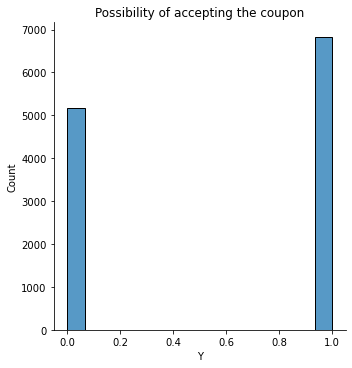

In [150]:
#closer look at Y distribution
#Checking target frequency
sns.displot(df, x='Y')
plt.title("Possibility of accepting the coupon")

In [151]:
#to confirm Y is well balanced
df.Y.value_counts()

1    6825
0    5182
Name: Y, dtype: int64

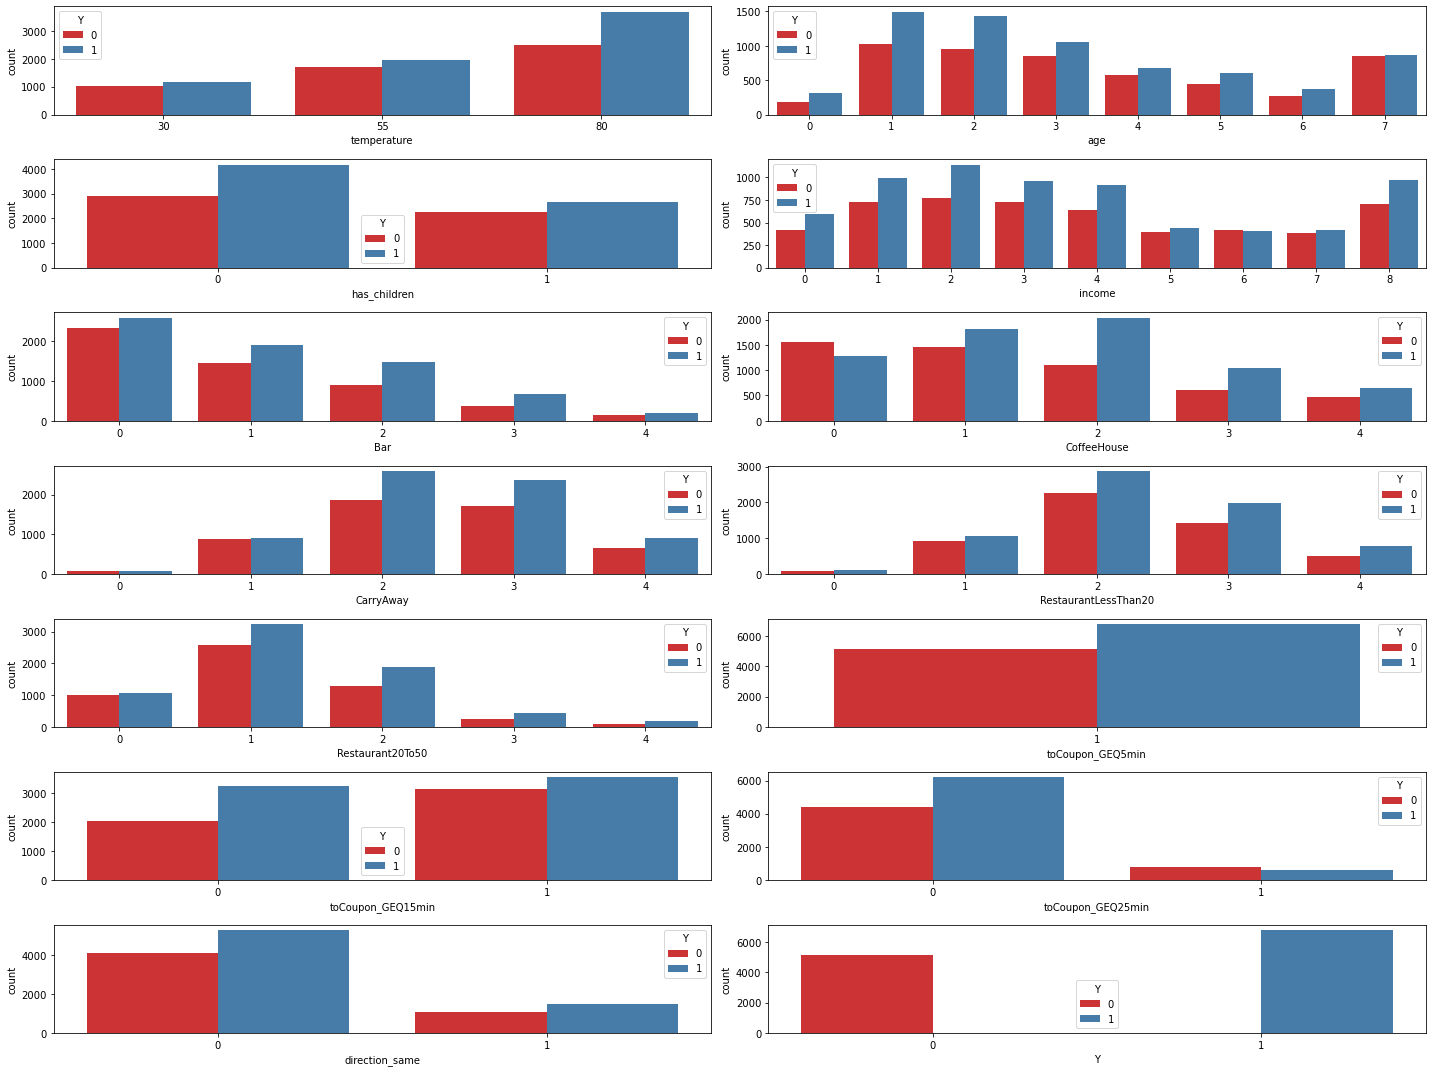

In [152]:
fig, axes = plt.subplots(7, 2, figsize=(20, 15))
axes = axes.flatten()
  
for ax, col in zip(axes, df.select_dtypes('int64').columns):
    sns.countplot(x=col, hue='Y', data=df, 
                  ax=ax, palette="Set1");

plt.tight_layout()
plt.show()

Observations:

destination to Y relation: The possibility of accepting the coupon is higher when the drivers have no urgent place to go.

passenger to Y relation: The possibility of accepting the coupon is higher when the driver is alone.

weather to Y relation: The possibility of accepting the coupon is higher when it is sunny.

temperature to Y relation: The possibility of accepting the coupon is higher when when it is 80 degrees.

time to Y relation: The probability of accepting the coupon is higher, if the time is 6pm or 7pm, and not during the day.

coupon to Y relation: 1) The possibility of accepting coupons for resturants that cost less than 20 dollars, carry out and take away is high. 2) The acceptance and rejection of coffee house coupons is equal. 3) coupons for bars and resturants that cost between 20-50 dollars have a higher rejection rate.

expiration to Y relation: Coupon that expire in one day have higher acceptance rate than the ones expiring in two hours.

gender to Y relation: Both genders have the same rates.

age to Y relation: drivers between 21 to 36 years old accept more coupons.

maritalStatus to Y relation: Single drivers accept the coupons more.

has_children to Y relation: Driver's who do not have children are more likely to accept coupons.

education to Y relation: Some college, Bachelor or high school graduate are more likely to accept the coupon.

occupation to Y relation: drivers who are unemployed, students, work in sales, or computers have the highest tendency to accept the copouns.

income to Y relation: middle class drivers have a higher tendency to accept the copouns.

Bar to Y relation: The lower the frequancy of visits the higher possiblity of accepting the copoun.

CoffeeHouse to Y relation: moderate frequancy of visits has a higher possiblity of accepting the coupon.

CarryAway to Y relation: moderate frequancy of visits has a higher possiblity of accepting the coupon.

RestaurantLessThan20 to Y relation: moderate frequancy of visits has a higher possiblity of accepting the coupon.
Restaurant20To50 to Y relation: if the driver went less than once they have a higher tendancy of accepting the copoun.
toCoupon_GEQ15min to Y relation: not much difference
toCoupon_GEQ25min to Y relation: if the distance is less than 25mins to the ccpou location it will be more likley to be accepted.
direction_same to Y relation: if the direction is not the same, the coupons get purchased more.